In [162]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

### 데이터 로드

In [163]:
df = pd.read_csv('./data/Bank Customer Churn Prediction.csv')

### 데이터 확인

In [164]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [165]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB
None


* 결측값 없음
* 데이터 타입 확인

In [166]:
print(df.describe())

        customer_id  credit_score           age        tenure        balance  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000   10000.000000   
mean   1.569094e+07    650.528800     38.921800      5.012800   76485.889288   
std    7.193619e+04     96.653299     10.487806      2.892174   62397.405202   
min    1.556570e+07    350.000000     18.000000      0.000000       0.000000   
25%    1.562853e+07    584.000000     32.000000      3.000000       0.000000   
50%    1.569074e+07    652.000000     37.000000      5.000000   97198.540000   
75%    1.575323e+07    718.000000     44.000000      7.000000  127644.240000   
max    1.581569e+07    850.000000     92.000000     10.000000  250898.090000   

       products_number  credit_card  active_member  estimated_salary  \
count     10000.000000  10000.00000   10000.000000      10000.000000   
mean          1.530200      0.70550       0.515100     100090.239881   
std           0.581654      0.45584       0.499797      57510.4

In [167]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

* 결측값 없음

#### object type 의 값 확인

In [168]:
df.select_dtypes(include='object').nunique()

country    3
gender     2
dtype: int64

* country 는 3개, gender 는 2개의 유니크 값을 가지고 있다. 따라서 라벨인토딩보다 원-핫 인코딩이 적합

### encoding

In [169]:
df['country']
df['gender']

0       Female
1       Female
2       Female
3       Female
4       Female
         ...  
9995      Male
9996      Male
9997    Female
9998      Male
9999    Female
Name: gender, Length: 10000, dtype: object

In [170]:
# df_country_encoded = pd.get_dummies(df['country'], prefix='Contry')

# df = pd.concat([df, df_country_encoded], axis=1)

# df.head()

df['country'] = df['country'].map({'France': 0, 'Spain' : 1,'Germany':2})

In [171]:
# df_gender_encoded = df['gender'].apply(lambda x: 0 if x == 'Male' else 1)

# df_gender_encoded.name = 'gender_encoded'

# df = pd.concat([df, df_gender_encoded], axis=1)

# df.head(10)

df['gender'] = df['gender'].map({'Male': 0, 'Female' : 1})

In [172]:
# 데이터프레임에서 'country'와 'gender' 열 삭제
# df.drop(['country', 'gender'], axis=1, inplace=True)

# 변경된 데이터프레임 확인
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,1,1,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,1,1,43,2,125510.82,1,1,1,79084.10,0


### 주요 변수 간 상관 관계 확인

age                 0.285323
country             0.153771
balance             0.118533
gender              0.106512
estimated_salary    0.012097
customer_id        -0.006248
credit_card        -0.007138
tenure             -0.014001
credit_score       -0.027094
products_number    -0.047820
active_member      -0.156128
Name: churn, dtype: float64


C:\Users\Playdata\AppData\Local\Temp\ipykernel_22516\3513722121.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_corr_sorted.index, y=churn_corr_sorted.values, palette='coolwarm')


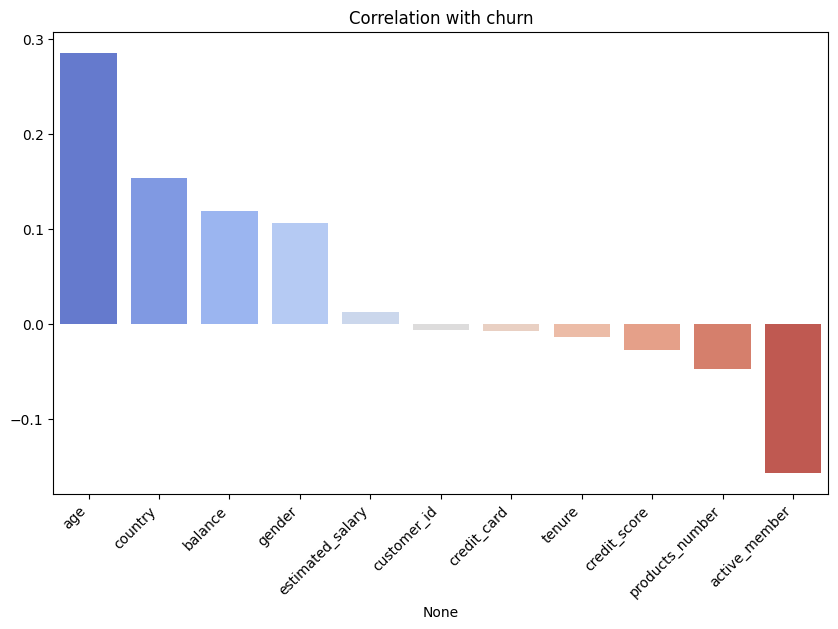

In [173]:
corr_matrix = df.corr()

churn_corr = corr_matrix['churn'].drop('churn')

churn_corr_sorted = churn_corr.sort_values(ascending=False)

print(churn_corr_sorted)

plt.figure(figsize=(10, 6))
sns.barplot(x=churn_corr_sorted.index, y=churn_corr_sorted.values, palette='coolwarm')
plt.title('Correlation with churn')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

* 고객 이탈율과의 상관관계를 보았을떄 가장 높은 상관관계를 보인 것은 age 였다. 
* 다만 절대값이 0.3 이하의 낮은 값을 보여주고 있어 전체적으로 고객 이탈율과 강한 상관관계를 가지고 있는 컬럼은 확인할 수 없었다.

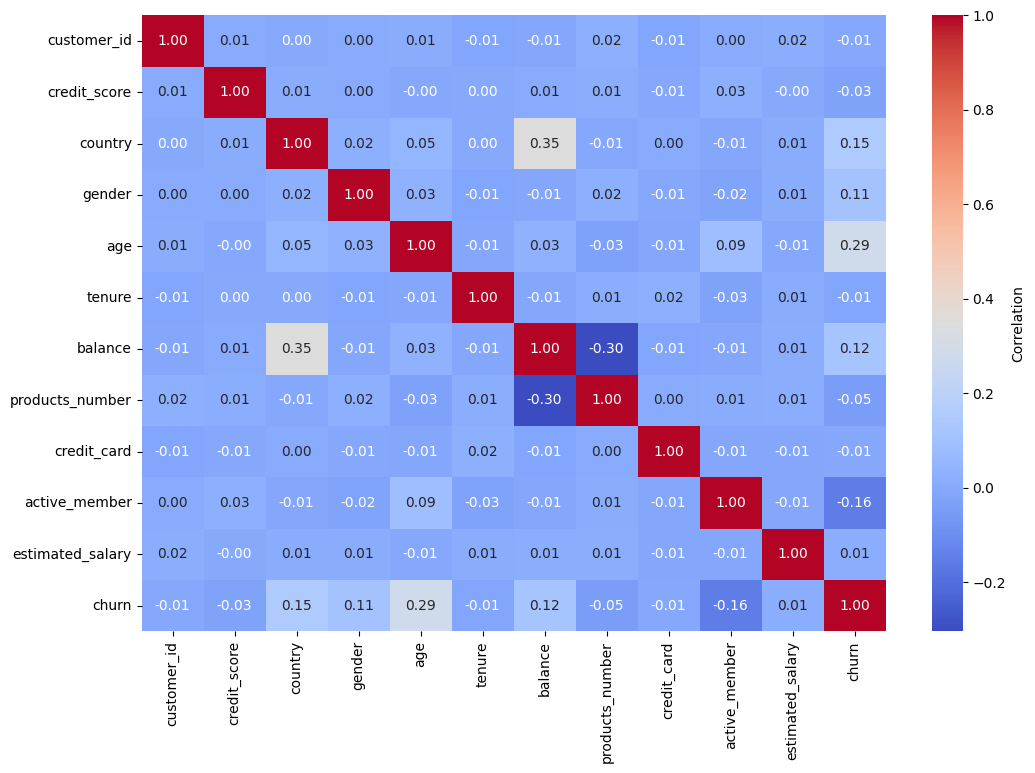

In [174]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt= '.2f', cbar_kws={'label': 'Correlation'} )
plt.show()

In [175]:

# 결측값 처리 (예시: 평균으로 채우기)
df_const = add_constant(df)  # 상수 추가
df_const = df_const.fillna(df_const.mean())  # 결측값 평균으로 채우기

# 숫자형 데이터만 선택
df_const = df_const.select_dtypes(include=[np.number])

# VIF 계산
vif_data = pd.DataFrame()
vif_data['Variable'] = df_const.columns
vif_data['VIF'] = [variance_inflation_factor(df_const.values, i) for i in range(df_const.shape[1])]

# VIF 결과 출력
print(vif_data[1:])


            Variable       VIF
1        customer_id  1.001221
2       credit_score  1.001659
3            country  1.171088
4             gender  1.012944
5                age  1.110538
6             tenure  1.002381
7            balance  1.276426
8    products_number  1.118586
9        credit_card  1.001436
10     active_member  1.046584
11  estimated_salary  1.001270
12             churn  1.172563


* 각 변수들 간의 상관관계는 낮은 것으로 나타났다.
* 추가적인 처리 불필요

#### 로그 변환

* balance, estimated_salary 는 단위가 크고 치우침이 있는 데이터라 로그 변환이 필요하다고 판단

In [176]:
# log_needed_df = df[['balance', 'estimated_salary']]

# 1. 왜도 계산 
skewness = df.skew()

# 2. 왜도가 1보다 큰 컬럼들 확인 
skewed_colums = skewness[skewness > 1].index
print("왜도가 1보다 큰 컬럼들:", skewed_colums)

왜도가 1보다 큰 컬럼들: Index(['age', 'churn'], dtype='object')


### 시각화 

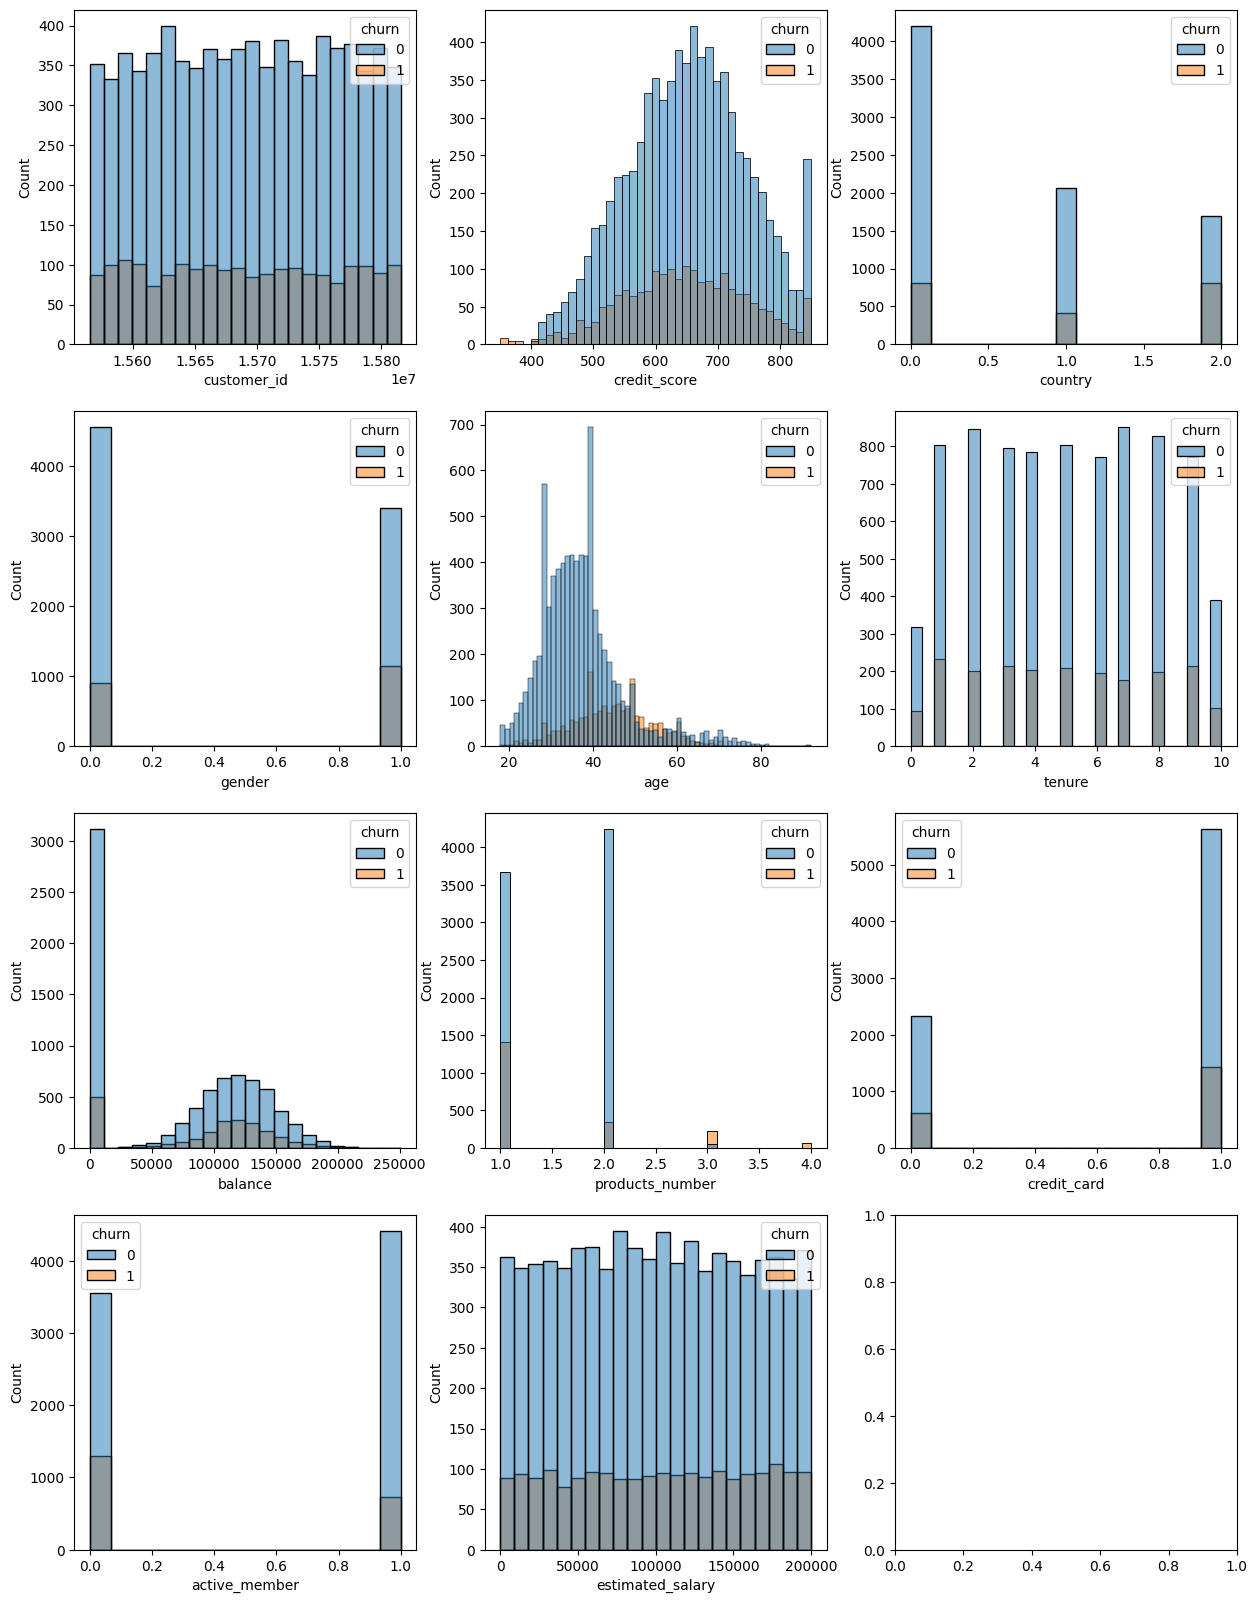

In [179]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15,20))
axs=axs.flat
for i in range(len(df.columns)-1):
    sns.histplot(data=df, x=df.columns[i],hue="churn",ax=axs[i])

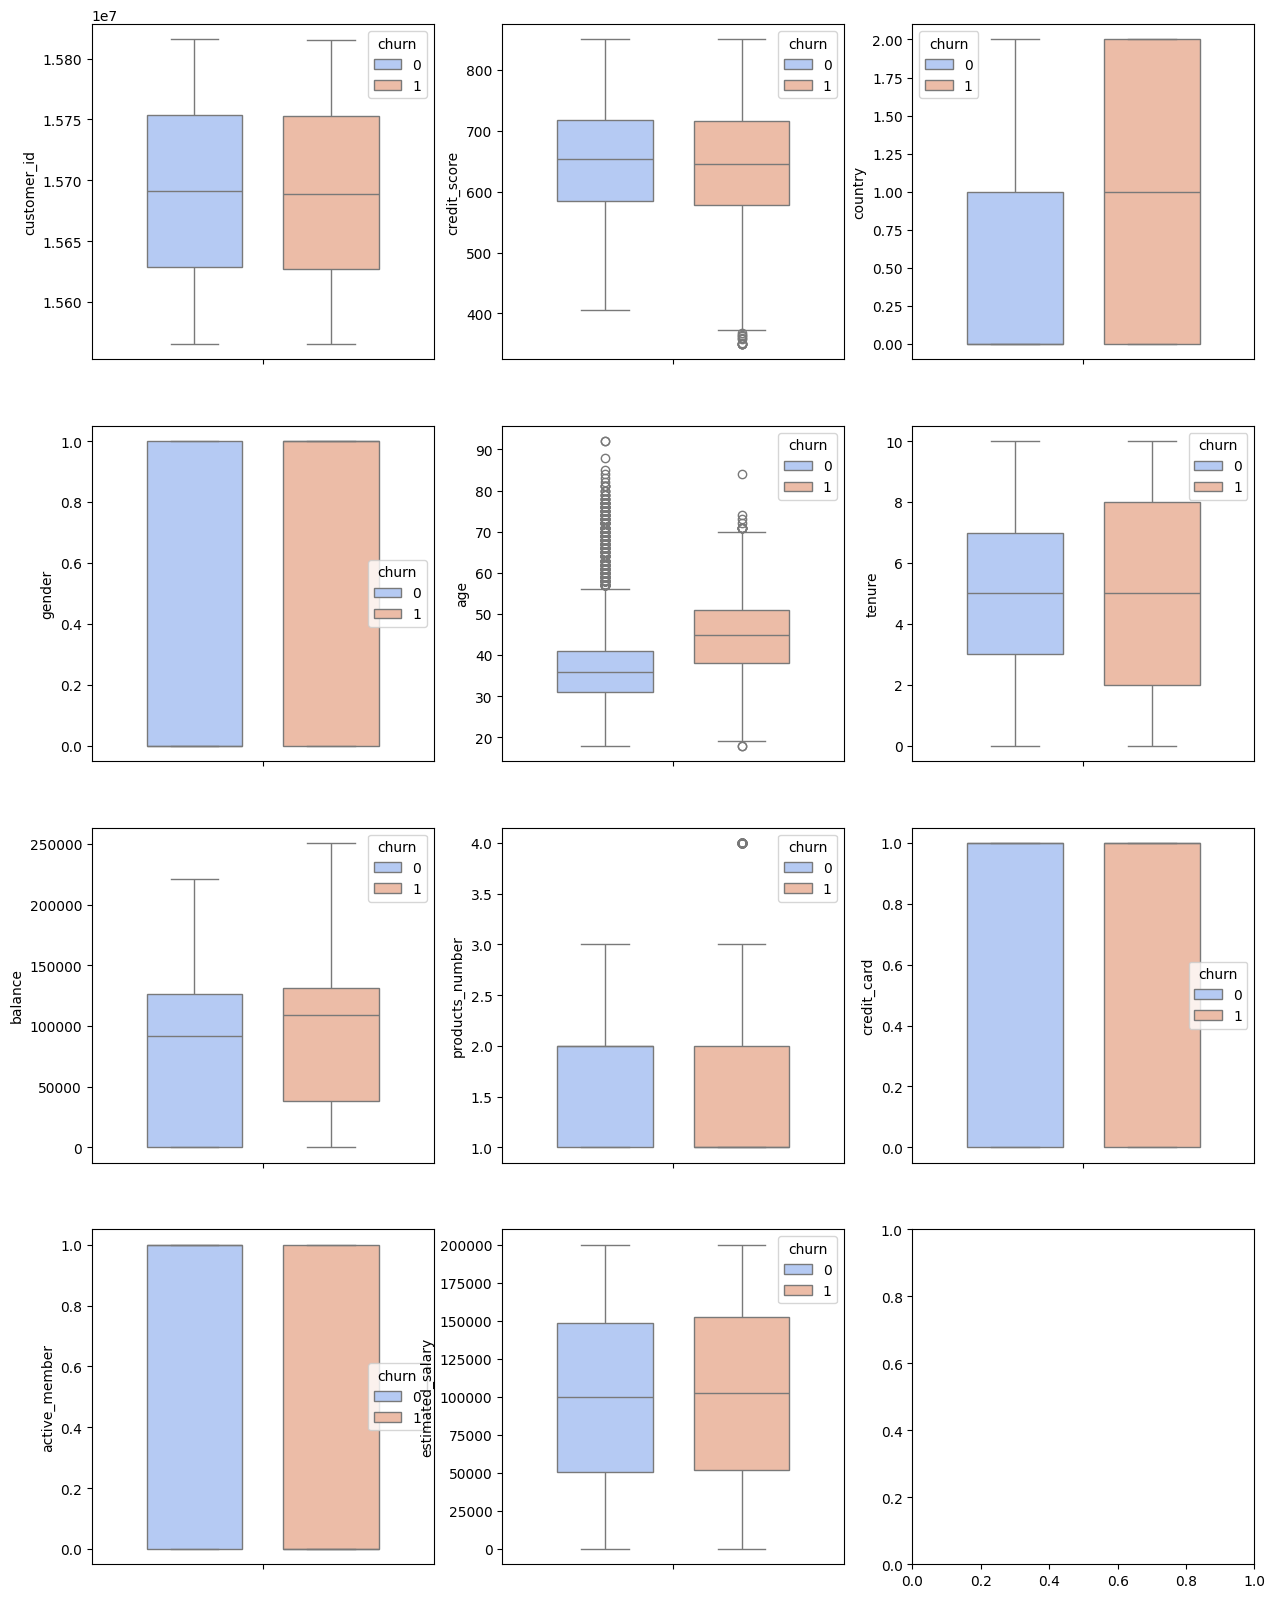

In [186]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15,20))
axs=axs.flat
for i in range(len(df.columns)-1):
    sns.boxplot(data=df, y=df.columns[i],hue="churn",ax=axs[i], gap=0.3, palette='coolwarm')